# Milestone 2 – Week 3: Univariate & Bivariate Visual Analysis

## Objective

The goal of this week’s milestone is to perform exploratory visual analysis on the cleaned airline dataset to identify:

Top airlines, routes, and busiest months

Flight distribution by day, time, and airport

Key delay patterns and correlations

The analysis focuses on Univariate and Bivariate visualization techniques using Python libraries such as matplotlib and seaborn.

In [0]:
# ==========================================================
#  SETUP AND DATA LOADING
# ==========================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize'] = (10,6)
sns.set(style="whitegrid")

# Load cleaned dataset
df = pd.read_csv("/Volumes/workspace/default/airlines/Flight_delay_cleaned_final.csv", low_memory=False)
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (484549, 44)


,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Org_Airport,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepHour,DepMinute,DepDatetime,Month,Hour,Route,DepDate,DayName,ArrDelay_was_missing,CarrierDelay_was_missing,DepDelay_was_missing,LateAircraftDelay_was_missing,NASDelay_was_missing,SecurityDelay_was_missing,WeatherDelay_was_missing
0,3,2019-01-03,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,90,77,34,34,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,515,3,10,False,N,0,2,0,0,0,32,18,29,2019-01-03 18:29:00,1,18,IND-BWI,2019-01-03,Thursday,False,False,False,False,False,False,False
1,3,2019-01-03,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,250,230,57,67,IND,Indianapolis International Airport,LAS,McCarran International Airport,1591,3,7,False,N,0,10,0,0,0,47,19,37,2019-01-03 19:37:00,1,19,IND-LAS,2019-01-03,Thursday,False,False,False,False,False,False,False
2,3,2019-01-03,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,135,107,80,94,IND,Indianapolis International Airport,MCO,Orlando International Airport,828,6,8,False,N,0,8,0,0,0,72,16,44,2019-01-03 16:44:00,1,16,IND-MCO,2019-01-03,Thursday,False,False,False,False,False,False,False
3,3,2019-01-03,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,240,213,15,27,IND,Indianapolis International Airport,PHX,Phoenix Sky Harbor International Airport,1489,7,8,False,N,0,3,0,0,0,12,14,52,2019-01-03 14:52:00,1,14,IND-PHX,2019-01-03,Thursday,False,False,False,False,False,False,False
4,3,2019-01-03,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,135,110,16,28,IND,Indianapolis International Airport,TPA,Tampa International Airport,838,4,9,False,N,0,0,0,0,0,16,13,23,2019-01-03 13:23:00,1,13,IND-TPA,2019-01-03,Thursday,False,False,False,False,False,False,False


# Section 1 – Top Insights (Univariate Analysis)

## 1. Top Airlines by Number of Flights

In [0]:
print(df.columns.tolist())


['DayOfWeek', 'Date', 'DepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'Airline', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Org_Airport', 'Dest', 'Dest_Airport', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DepHour', 'DepMinute', 'DepDatetime', 'Month', 'Hour', 'Route', 'DepDate', 'DayName', 'ArrDelay_was_missing', 'CarrierDelay_was_missing', 'DepDelay_was_missing', 'LateAircraftDelay_was_missing', 'NASDelay_was_missing', 'SecurityDelay_was_missing', 'WeatherDelay_was_missing']


/home/spark-54d669fc-d9f7-4acc-9aa9-8b/.ipykernel/2408/command-6794251531132797-2892822277:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airlines.index, y=top_airlines.values, palette="crest")


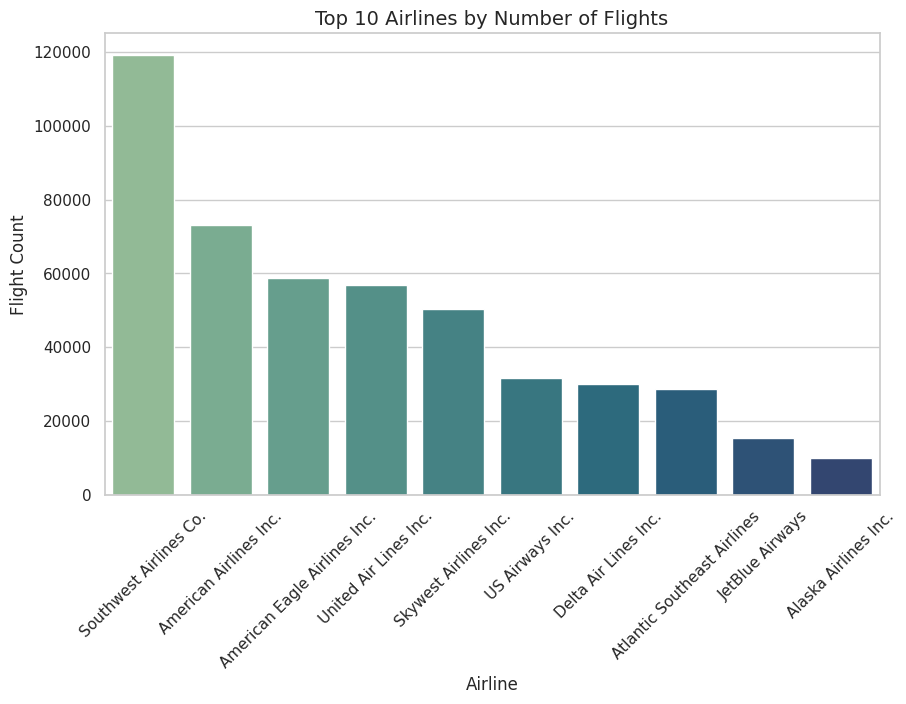

In [0]:
top_airlines = df['Airline'].value_counts().head(10)

sns.barplot(x=top_airlines.index, y=top_airlines.values, palette="crest")
plt.title("Top 10 Airlines by Number of Flights", fontsize=14)
plt.xlabel("Airline")
plt.ylabel("Flight Count")
plt.xticks(rotation=45)
plt.show()


## 2. Top Routes by Flight Count

/home/spark-54d669fc-d9f7-4acc-9aa9-8b/.ipykernel/2408/command-6794251531132800-99634248:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_routes.values, y=top_routes.index, palette="flare")


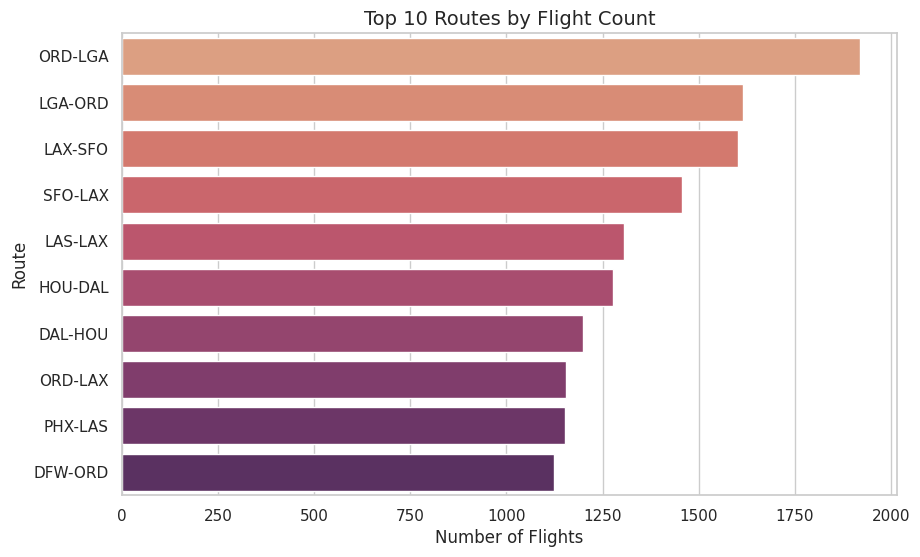

In [0]:
top_routes = df['Route'].value_counts().head(10)

sns.barplot(x=top_routes.values, y=top_routes.index, palette="flare")
plt.title("Top 10 Routes by Flight Count", fontsize=14)
plt.xlabel("Number of Flights")
plt.ylabel("Route")
plt.show()


## 3. Average Arrival Delay by Hour of Day

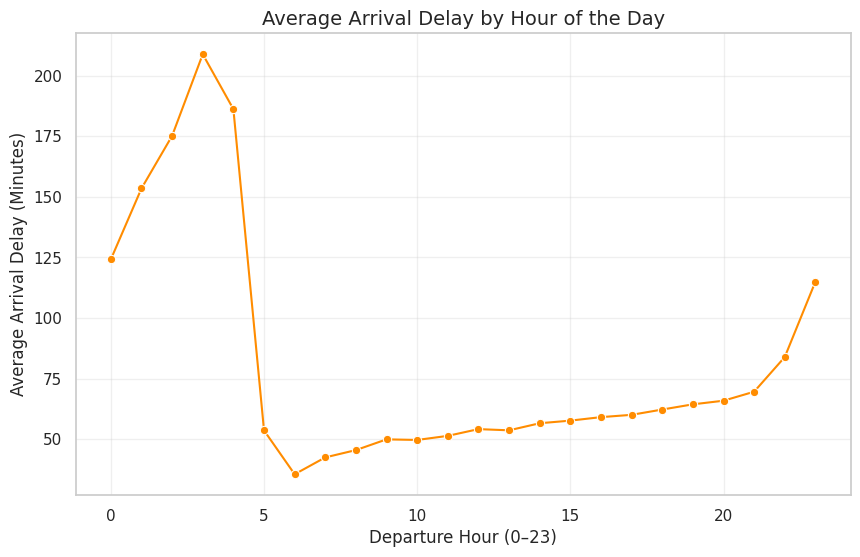

In [0]:


avg_arr_delay_hour = df.groupby('DepHour')['ArrDelay'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='DepHour', y='ArrDelay', data=avg_arr_delay_hour, marker='o', color='darkorange')

plt.title("Average Arrival Delay by Hour of the Day", fontsize=14)
plt.xlabel("Departure Hour (0–23)")
plt.ylabel("Average Arrival Delay (Minutes)")
plt.grid(alpha=0.3)
plt.show()


# Section 2 – Flight Distribution by Day, Time, and Airport

## 4. Flight Distribution by Day of the Week

/home/spark-54d669fc-d9f7-4acc-9aa9-8b/.ipykernel/2408/command-6794251531132806-1649688311:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayName', data=df, order=day_order, palette="mako")


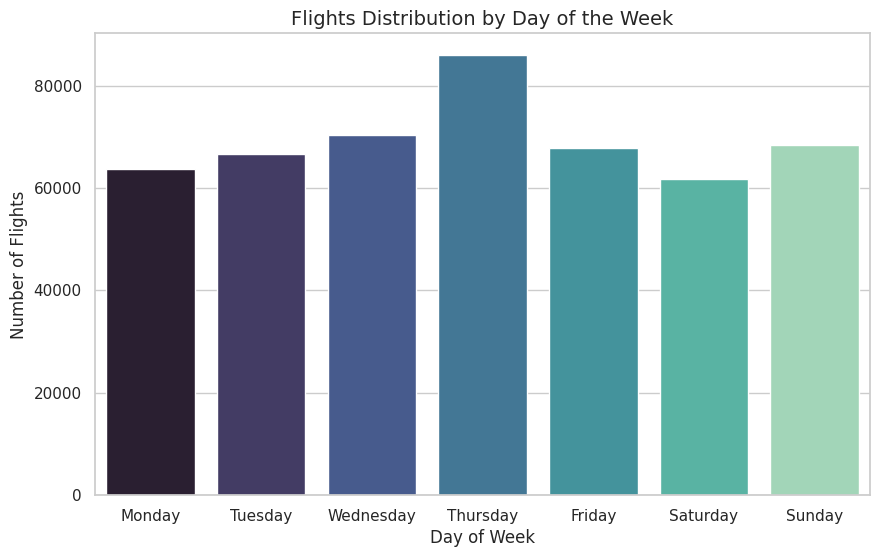

In [0]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(x='DayName', data=df, order=day_order, palette="mako")
plt.title("Flights Distribution by Day of the Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Number of Flights")
plt.show()


## 5. Flight Frequency by Departure Hour

/home/spark-54d669fc-d9f7-4acc-9aa9-8b/.ipykernel/2408/command-6794251531132808-561701293:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DepHour', data=df, palette="rocket")


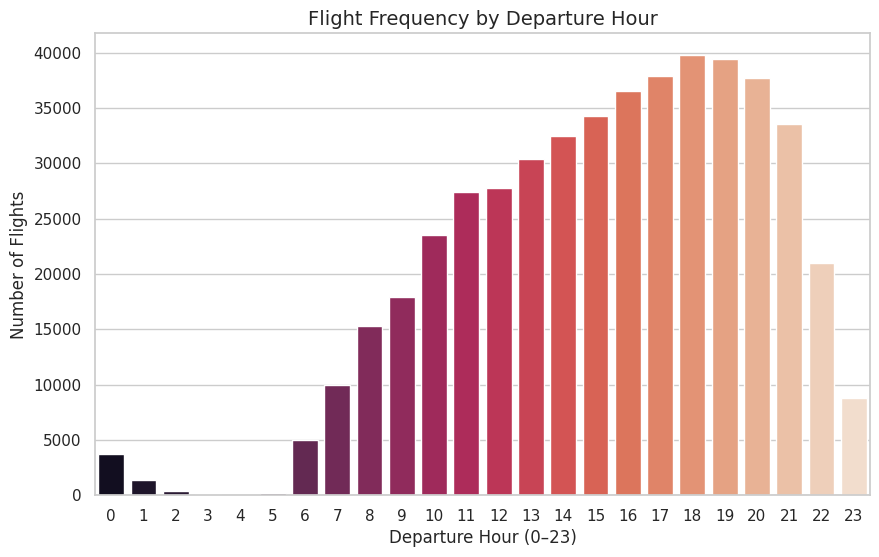

In [0]:
sns.countplot(x='DepHour', data=df, palette="rocket")
plt.title("Flight Frequency by Departure Hour", fontsize=14)
plt.xlabel("Departure Hour (0–23)")
plt.ylabel("Number of Flights")
plt.show()


## 6. Top 10 Origin Airports by Flight Volume

/home/spark-54d669fc-d9f7-4acc-9aa9-8b/.ipykernel/2408/command-6794251531132810-328227027:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_origin.values, y=top_origin.index, palette="cool")


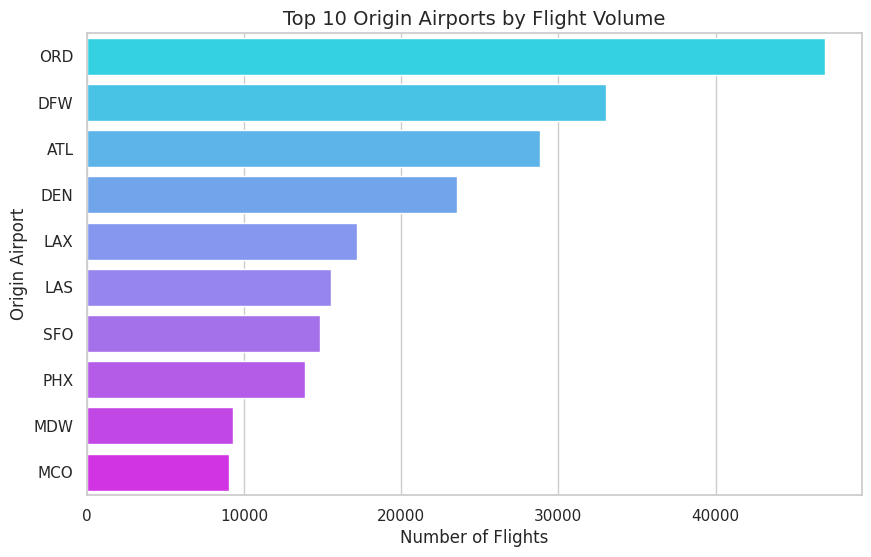

In [0]:
top_origin = df['Origin'].value_counts().head(10)

sns.barplot(x=top_origin.values, y=top_origin.index, palette="cool")
plt.title("Top 10 Origin Airports by Flight Volume", fontsize=14)
plt.xlabel("Number of Flights")
plt.ylabel("Origin Airport")
plt.show()


# Section 3 – Delay Analysis (Bivariate Analysis)

## 7. Average Departure Delay by Month

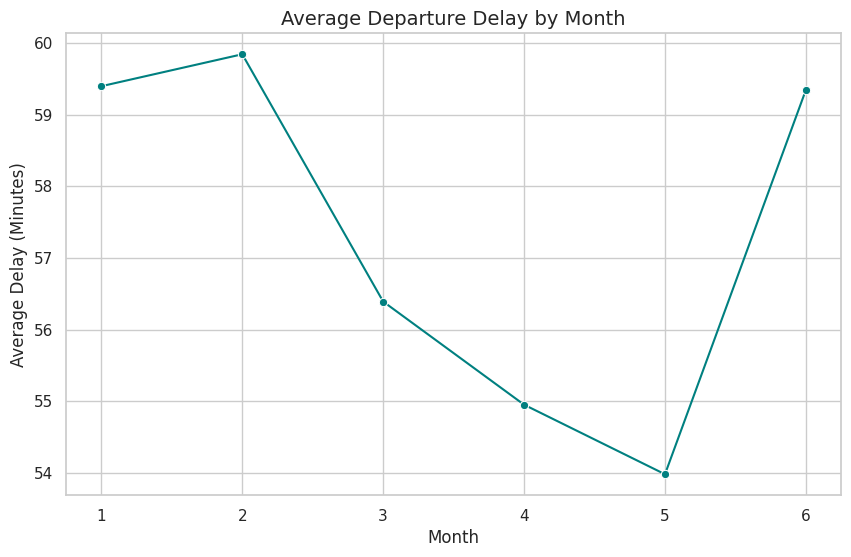

In [0]:
avg_delay_month = df.groupby('Month')['DepDelay'].mean().reset_index()

sns.lineplot(x='Month', y='DepDelay', data=avg_delay_month, marker='o', color='teal')
plt.title("Average Departure Delay by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average Delay (Minutes)")
plt.show()


## 8. Average Departure Delay by Airline

/home/spark-54d669fc-d9f7-4acc-9aa9-8b/.ipykernel/2408/command-6794251531132815-1608721432:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_delay_airline.values, y=avg_delay_airline.index, palette="autumn")


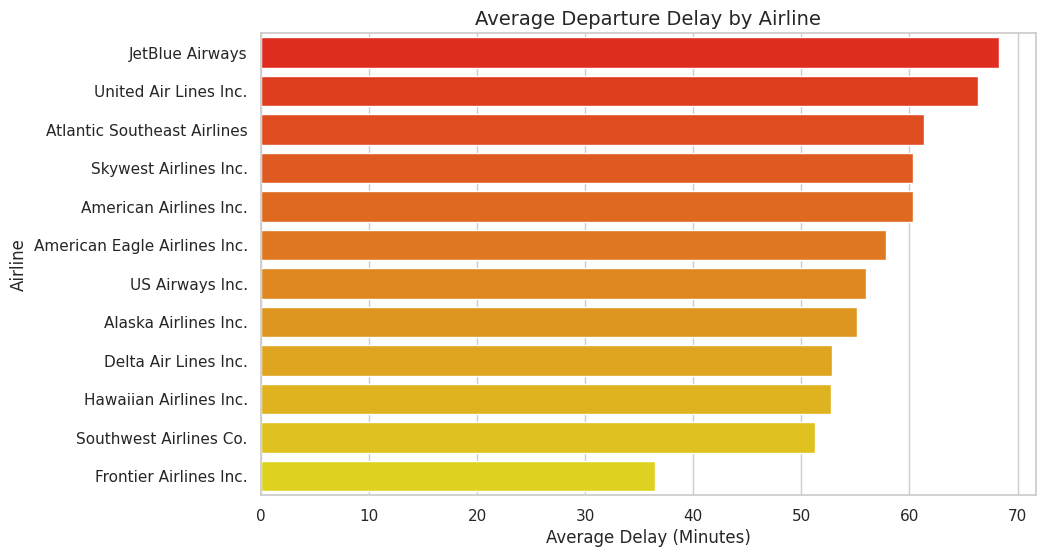

In [0]:
avg_delay_airline = df.groupby('Airline')['DepDelay'].mean().sort_values(ascending=False)

sns.barplot(x=avg_delay_airline.values, y=avg_delay_airline.index, palette="autumn")
plt.title("Average Departure Delay by Airline", fontsize=14)
plt.xlabel("Average Delay (Minutes)")
plt.ylabel("Airline")
plt.show()


##  9. Average Departure Delay by Day of Week and Airline

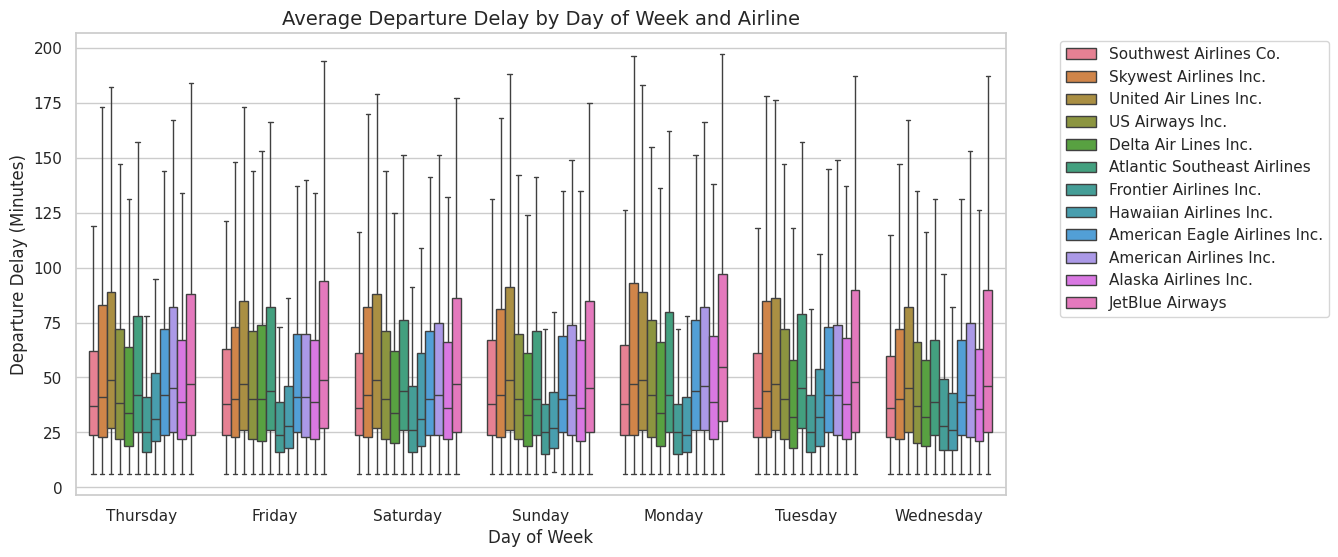

In [0]:
plt.figure(figsize=(12,6))
sns.boxplot(x='DayName', y='DepDelay', hue='Airline', data=df, showfliers=False)
plt.title("Average Departure Delay by Day of Week and Airline", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Departure Delay (Minutes)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


## 10. On-Time vs Delayed Flights by Day of Week

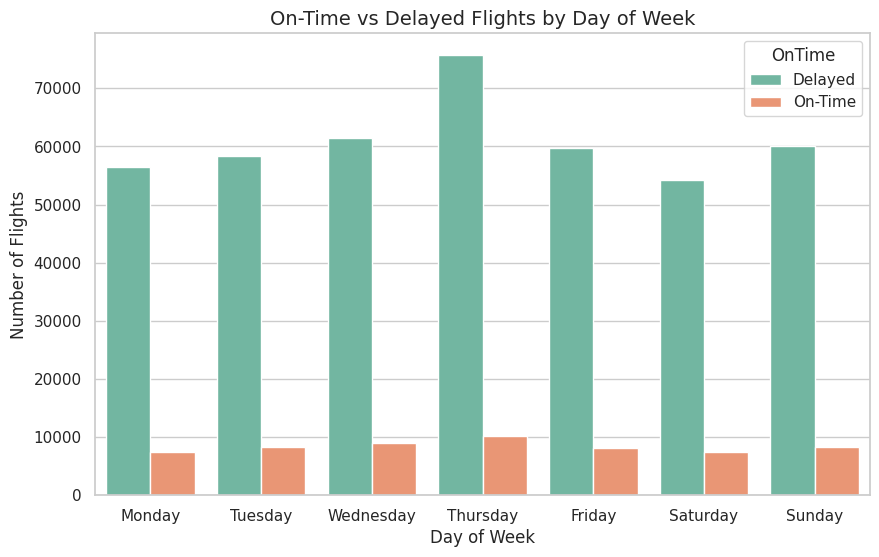

In [0]:
df['OnTime'] = np.where(df['DepDelay']<=15, 'On-Time', 'Delayed')
on_time_counts = df.groupby(['DayName','OnTime']).size().reset_index(name='Count')

plt.figure(figsize=(10,6))
sns.barplot(x='DayName', y='Count', hue='OnTime', data=on_time_counts, order=day_order, palette="Set2")
plt.title("On-Time vs Delayed Flights by Day of Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Number of Flights")
plt.show()


##  Delay Cause Contribution

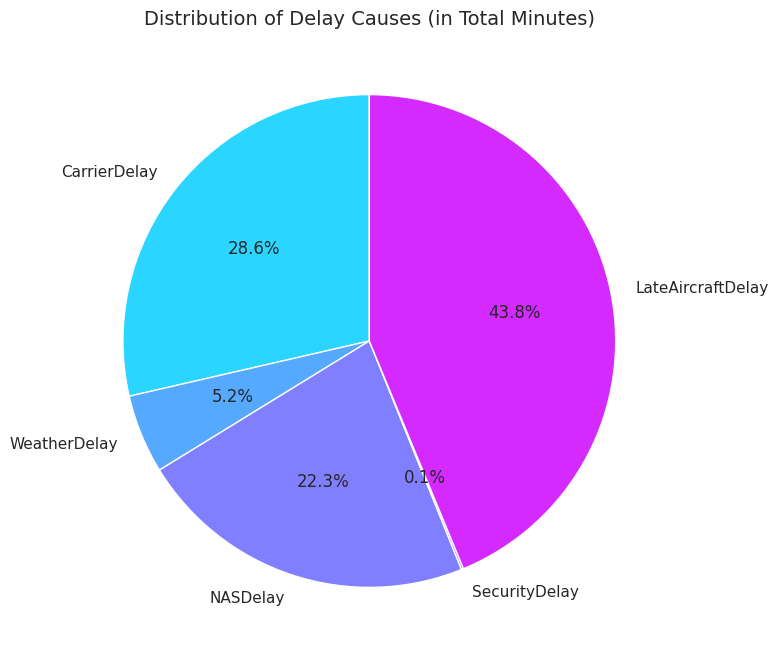

In [0]:


# Select delay-related columns
delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# Calculate total delay minutes for each cause
delay_sums = df[delay_cols].sum()

# Create pie chart
plt.figure(figsize=(8,8))
colors = sns.color_palette("cool", len(delay_sums))

plt.pie(delay_sums.values,
        labels=delay_sums.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor':'white'})

plt.title("Distribution of Delay Causes (in Total Minutes)", fontsize=14)
plt.show()


# Section 4 – Correlation and Extended Insights

## 11. Correlation Heatmap of Delay Factors

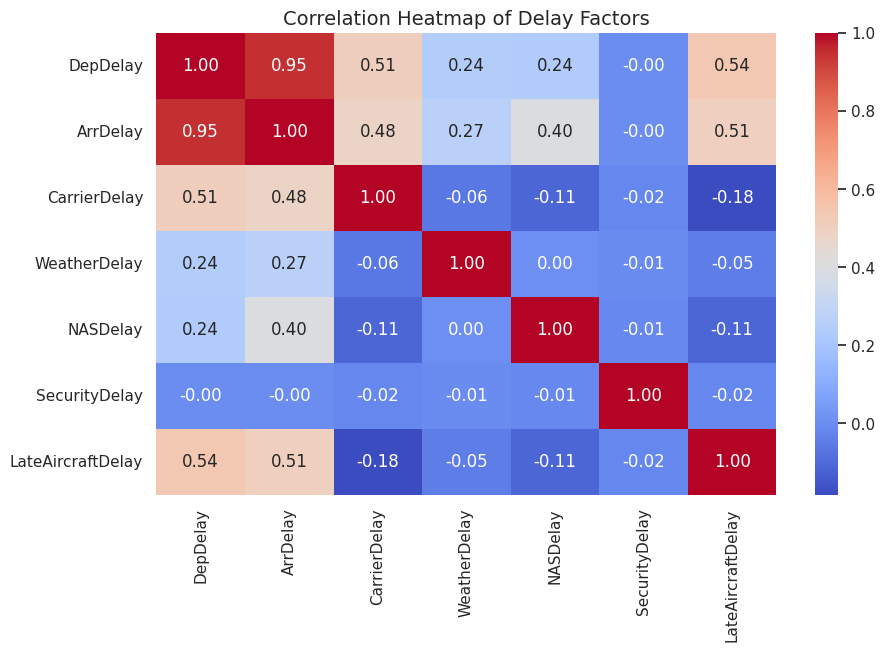

In [0]:
num_cols = ['DepDelay','ArrDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
corr = df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Delay Factors", fontsize=14)
plt.show()
